In [11]:
import numpy as np

In [2]:
lr = LinearRegression()

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pdf3 = pd.read_csv("../data/intermediate/comb_interests_1.csv")  # Matches, hopefully, but quite possibly not.
pdf3.drop('Unnamed: 0', axis=1, inplace=True)
pdf3['DATUM:TIJD'] = pdf3['DATUM:TIJD'].apply(pd.to_datetime)

pdf3.rename({'DATUM:TIJD':'TIME'}, axis=1, inplace=True)

land = pdf3[pdf3.kmeans==0]

In [270]:
def w_previous(gen):
    gen = iter(gen)
    prev = next(gen, None)
    if prev:
        while True:
            got = next(gen, None)
            if not got: return
            yield (prev, got)
            prev = got

Poging aan te nemen dat NO2 omgezet word naar NO3. Zoals te zien geen success. Ook niet met temperatuur.

Misschien is het vaak stromend water, en de tijdsintervallen zijn wellicht te groot.

Zelfs als de relaties bestaan, zitten dingen vol met frustrating parameters?
I.e veel NO2 *maar* lage temperatuur. Of weinig fosfaat.
[Nitrobacter](https://en.wikipedia.org/wiki/Nitrobacter) waarschijnlijk vaak een omzetter?

In [285]:
cdf.Ql.mean() or 1

nan

Total number of entries: 5349


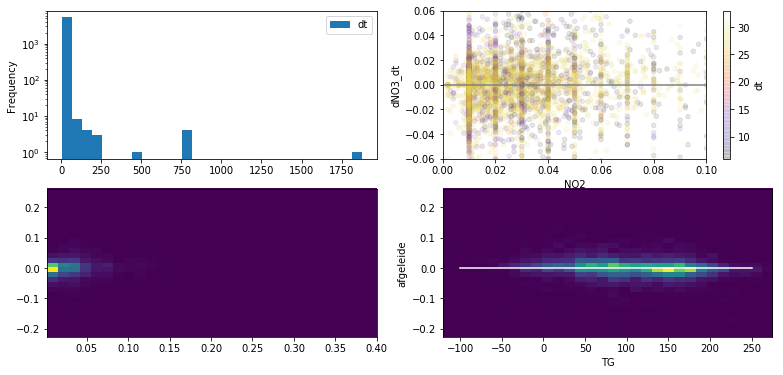

In [321]:
import math

def dNO3_dt(ret, k, cdf):
    cdf = cdf.sort_values('TIME')
    ql = cdf.Ql.mean() + math.sqrt(cdf.Ql.var())
    if len(cdf) > 1:
        ret['dNO3_dt'] += [(no3 - pno3)/((time - ptime).total_seconds()/3600/24)
                            for (pno3,no3),(ptime,time)#,(pT,T)
                            in zip(w_previous(cdf.NO3), w_previous(cdf.TIME))]
        ret['NO2'] += list(cdf.NO2[1:])
        ret['NH4'] += list(cdf.NH4[1:])
        ret['TG'] += list(cdf.TG[1:])
        ret['Ql'] += [ql for e in range(len(cdf.NO2)-1)]  # Nutteloos?
        ret['dt'] += [(t-pt).total_seconds()/3600/24 for pt,t in w_previous(cdf.TIME)]

def show_stuff(ret):
    result = pd.DataFrame(ret)
    print("Total number of entries:", len(result.dt))

    #bplt.hist2d(*ret)

    fig,ax = plt.subplots(2,2, figsize=(13,6))

    result.plot.hist(y='dt', logy=True, bins=30, ax=ax[0][0])
    #ax[0].set_xlabel=('tijd tussen metingen')

    result[(result.dt < 33)].\
        plot.scatter('NO2', 'dNO3_dt', alpha=0.1, ax=ax[0][1], c='dt', cmap='CMRmap',
                     xlim=(0,0.1), 
                     ylim=(-0.06,0.06))
    ax[0][1].plot([0,0.1],[0,0], color='gray')

    #result[(result.dt < 90)].\
    #    plot.scatter('TG', 'dNO3_dt', alpha=0.1, ax=ax[1][1], c='dt', cmap='CMRmap',
    #                 #xlim=(0,0.1), 
    #                 ylim=(-0.06,0.06))

    ax[1][0].hist2d(result.NO2, result.dNO3_dt, bins=30)
    ax[1][1].hist2d(result.TG, result.dNO3_dt, bins=30)
    ax[1][1].plot([-100,250],[0,0], color='white')
    ax[1][1].set_xlabel('TG')
    ax[1][1].set_ylabel('afgeleide')

land = pdf3[pdf3.kmeans==0]
land = land[~land.NO2.isna() & ~land.NO3.isna() & ~land.TG.isna()]

ret = {k:[] for k in ['dNO3_dt','NO2','NH4','dt', 'TG', 'Ql']}

for k, cdf in land.groupby(['LOC', 'PLT:X','PLT:Y']):
    dNO3_dt(ret, k, cdf)
show_stuff(ret)

Total number of entries: 273


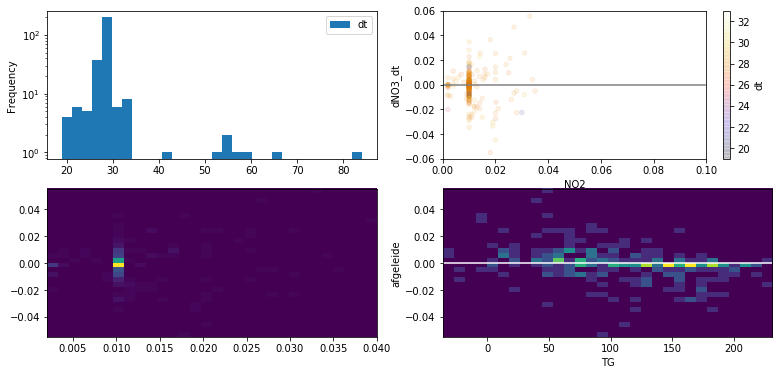

In [322]:
ret = {k:[] for k in ['dNO3_dt','NO2','NH4','dt', 'TG', 'Ql']}

for k,cdf in land.groupby(['LOC', 'PLT:X', 'PLT:Y']): # Locaties rond Flevoland.
    if k[0] in ['GOOIMMDN', 'PAMPOT', 'HOORNSHP', 'BROEKHVN', 'ANDK', 'VROUWZD', 'STEILBK', '']:
        dNO3_dt(ret, k, cdf)

show_stuff(ret)